# Polar Bear and Sea Ice Data

Chinmayee Balabhadrapatruni<br>
Jared Kohler<br>
Nora Murray<br>
Muriel Pokol<br>


In [1]:
import pandas as pd
import numpy as np
import datetime
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly.offline as offline
import plotly.express as px


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Project Goals and Approach

Through this project, we hope to provide a better understanding of polar bear behavior and the current threats to this lovable creature.  While not endangered yet, they are considered a "vulnerable" species.  Researchers believe that the current largest threat to polar bears is melting sea ice.  Scientists predict that two-thirds of the world's polar bears could disappear within this century with the continued warming of the Arctic.[1]  We hope to clearly portray the relationship between melting sea ice in an easily understandable way and to demonstrate through an analysis of their behavior just why we believe that these animals should be protected. <br>

Our plan to portray the above is via our website content.  The website will contain visualizations on monitored polar bear behavior in the wild as well as a map of polar bear movement over time.  Polar bear movement and distance traveled will be shown compared to melting sea ice over time as well. <br>

Our project will draw heavily upon data collected by the U.S. Geological Survey starting in 1978 through today. We will use climate and sea ice data collected via NASA satellite imagery and maintained by the National Snow and Ice Data Center from the University of Colorado, Boulder. 

[1] http://polarbearsinternational.org/polar-bears

## Potential Research Questions

1. What are the typical day-to-day behaviors of polar bears?  Are they unexpected compared to what is observed from polar bears in captivity? <br>
<br>
2. What does polar bear movement look like on map?  According to researchers, polar bears are capable of traveling huge distances.  Does our data confirm this idea?  Diving deeper into their travel information, where do polar bears tend to travel and do they move together?<br>
<br>
3. The USGIS  has a very similar data set  of polar bear movement from the 1970's to present.  We plan to look at the data on the location and changing amount of sea ice in conjunction with polar bear movement data.  Given the changes in sea ice due to melting, does this mean that polar bears' distance traveled is correlated and has changed over time? 

#### GPS Data

In [2]:
gps = pd.read_csv('data/PolarBear_GPS_data_southernBeaufortSea_2014_2016.csv')

In [3]:
gps.dropna(axis=0, how='all', inplace=True)
gps.head()

Bear        Date     Time   Latitude   Longitude
0   1.0  07.04.2014  3:31:00  70.873828 -148.303468
1   1.0  07.04.2014  4:00:16  70.874098 -148.304568
2   1.0  07.04.2014  4:30:30  70.873831 -148.304152
3   1.0  07.04.2014  5:00:15  70.873819 -148.304152
4   1.0  07.04.2014  5:30:16  70.873881 -148.304274

In [4]:
bears= {}
for i in range(1,10):
    bears['{}'.format(i)] = gps[gps.Bear==float(i)]

In [5]:
mapbox_access_token = 'pk.eyJ1Ijoiamprb2hlciIsImEiOiJjanhtM3JncHIwMjY4M3BtbXV0Z2dvZzg0In0._o4vt3R-MDgSonaoHMmk8w'
#This is a public token, so not a problem to embed

colors =['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']
fig = go.Figure()

# Add Traces

for i in range(1,10):
    fig.add_trace(
    go.Scattermapbox(
        lon = bears[str(i)].Longitude,
        lat = bears[str(i)].Latitude,
        name = 'Bear {}'.format(i),
        mode = 'markers',
        marker_size = 3,
        marker_color = colors[i-1],
            opacity=0.3
        ))


fig.update_layout(
    title='Arctic',
    autosize=False,
    width=1000,
    height=900,
    hovermode='closest',
    showlegend=False,
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=71.15,
            lon=-147.402
        ),
        pitch=0,
        zoom=5.5,
        style='dark'
    ),
)

fig.update_layout(
    title=go.layout.Title(
        text='Polar Bear Paths<br>2014 to 2016',
        xref="paper",
        x=0.02,
        font=dict(
                family="Rockwell",
                size=20,
                color="darkred"
            )
    ),
        geo_scope='usa',
    )



fig.show()

In [6]:
loc_all = pd.read_csv('data/pb_location data 1978-present.csv')
loc_all.head()

BearID_mcp  DateTimeUTC_mcp  latitude_mcp  longitude_mcp
0           1   5/3/1992 22:12        74.005       -125.453
1           1   5/9/1992 23:54        74.325       -125.857
2           1  5/24/1992 21:26        74.099       -125.188
3           1   5/25/1992 0:18        74.148       -125.214
4           1   6/7/1992 23:08        73.470       -125.055

In [7]:
bears2= {}
for i in range(1,max(loc_all.BearID_mcp+1)):
    bears2['{}'.format(i)] = loc_all[loc_all.BearID_mcp==i]

In [8]:
fig = go.Figure()

# Add Traces

for i in range(1,309):
    fig.add_trace(
    go.Scattermapbox(
        lon = bears2[str(i)].longitude_mcp,
        lat = bears2[str(i)].latitude_mcp,
        name = 'Bear {}'.format(i),
        mode = 'markers',
        marker_size = 3,
            opacity=0.3
        ))

fig.update_layout(
    title='Arctic',
    autosize=False,
    width=1000,
    height=900,
    hovermode='closest',
    showlegend=False,
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=76,
            lon=-147.402
        ),
        pitch=0,
        zoom=2.5,
        style='dark'
    ),
)


fig.update_layout(
    title=go.layout.Title(
        text='Polar Bear Locations<br>1978 to Present',
        xref="paper",
        x=0.02,
        font=dict(
                family="Rockwell",
                size=20,
                color="darkred"
            )
    ),
        geo_scope='usa',
    )

fig.show()

#### Bear Behaviors

In [9]:
behaviors = pd.read_csv('data/PolarBear_video-derived_behaviors_southernBeaufortSea_2014_2016_revised.csv')

In [10]:
# Changing necessary fields to Datetime format
behaviors['Datetime_behavior_starts']= pd.to_datetime(behaviors['Datetime_behavior_starts'])
behaviors['Datetime_behavior_ends']= pd.to_datetime(behaviors['Datetime_behavior_ends'])

# Create a field for duration of time spent
behaviors['Time_Spent'] = behaviors['Datetime_behavior_ends'] - behaviors['Datetime_behavior_starts']
behaviors.head()

Bear Datetime_behavior_starts Datetime_behavior_ends             Behavior  \
0     1      2014-04-07 16:00:22    2014-04-07 16:01:12               laying   
1     1      2014-04-07 17:49:07    2014-04-07 17:49:57      rolling in snow   
2     1      2014-04-07 17:50:53    2014-04-07 17:51:31      rolling in snow   
3     1      2014-04-07 17:51:31    2014-04-07 17:51:53              walking   
4     1      2014-04-07 17:52:53    2014-04-07 17:53:53  sitting or standing   

                                       Comments Time_Spent  
0                                   moving head   00:00:50  
1  shaking head, adult male present in distance   00:00:50  
2  shaking head, adult male present in distance   00:00:38  
3         through rubble (away from adult male)   00:00:22  
4                                           NaN   00:01:00

#### A closer look at behaviors based on their frequency of occurance:

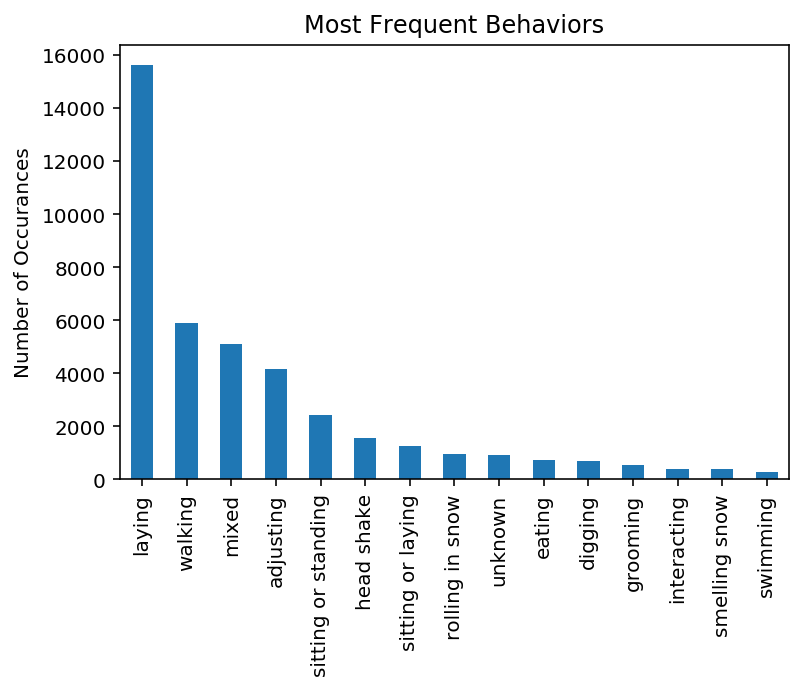

In [11]:
pd.value_counts(behaviors['Behavior']).head(15).plot.bar()
plt.ylabel('Number of Occurances')
plt.title('Most Frequent Behaviors')
plt.show()

In [12]:
behaviors.groupby('Behavior')['Behavior'].count().sort_values(ascending=False).head(10)

Behavior
laying                 15614
walking                 5906
mixed                   5115
adjusting               4163
sitting or standing     2449
head shake              1545
sitting or laying       1270
rolling in snow          945
unknown                  914
eating                   749
Name: Behavior, dtype: int64

**A closer look at behaviors based on the amount of time spent:**

In [13]:
top_behaviors = behaviors.groupby('Behavior')['Time_Spent'].apply(np.sum).sort_values(ascending=False).head(15)
top_behaviors

Behavior
laying                8 days 14:36:11
walking               2 days 01:18:42
mixed                 1 days 00:10:57
sitting or standing   0 days 22:57:16
sitting or laying     0 days 12:29:02
unknown               0 days 09:18:00
eating                0 days 06:05:54
adjusting             0 days 05:53:36
rolling in snow       0 days 04:37:50
grooming              0 days 03:29:37
digging               0 days 03:02:51
interacting           0 days 02:14:05
swimming              0 days 02:10:24
head shake            0 days 01:03:06
eating snow           0 days 01:01:59
Name: Time_Spent, dtype: timedelta64[ns]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:223: FutureWarning:

Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.



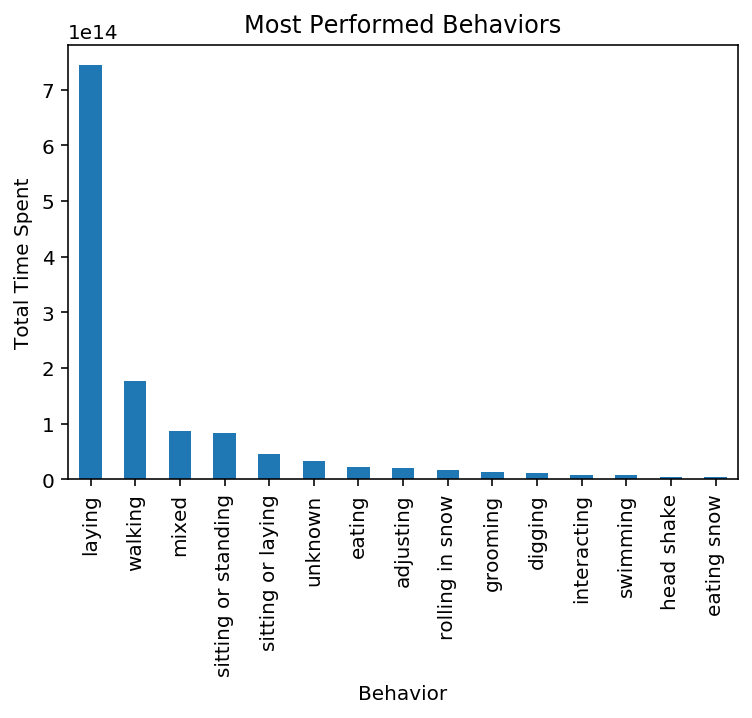

In [14]:
top_behaviors.plot.bar()
plt.ylabel('Total Time Spent')
plt.title('Most Performed Behaviors')
plt.show()

Here, we see that laying down is by far the most common activity. This is to be expected from an analysis of almost any animal. More interesting are the activities like interacting, head shaking, and eating snow. This tells us more about what day-to-day behaviors look like for polar bears.

In [15]:
behaviors_table = pd.pivot_table(behaviors,
                                 values='Time_Spent',
                                 index='Behavior',
                                 columns='Bear',
                                 aggfunc='sum',
                                margins=True)

behaviors_table

Bear                                      1               2        3  \
Behavior                                                               
adjusting                   0 days 00:05:30 0 days 00:02:19      NaT   
biting seal                             NaT             NaT      NaT   
breaking into liar          0 days 00:00:30             NaT      NaT   
breeding                    0 days 00:12:00 0 days 00:17:27      NaT   
carrying carcass            0 days 00:02:30             NaT 00:01:00   
catches seal                0 days 00:01:00             NaT      NaT   
crawling through ice cavern             NaT 0 days 00:01:03      NaT   
digging                     0 days 00:28:09 0 days 00:23:15 00:05:11   
eating                      0 days 00:32:33 0 days 01:11:38 00:12:30   
eating snow                 0 days 00:10:00 0 days 00:08:06 00:05:30   
grooming                    0 days 01:03:00 0 days 00:49:53 00:03:00   
hauling out of water                    NaT             NaT      NaT   
head shake                  0 days 00:00:30             NaT 00:01:30   
interacting                 0 days 00:22:23 0 days 00:15:24      NaT   
jumping                                 NaT 0 days 00:01:06      NaT   
laying                      0 days 16:06:38 1 days 14:00:28 06:00:05   
mixed                       0 days 01:45:48 0 days 01:19:57 00:43:20   
moving ice                              NaT             NaT      NaT   
pouncing                    0 days 00:00:30 0 days 00:02:06      NaT   
rolling in snow             0 days 01:15:02 0 days 00:20:20 00:19:02   
rubbing                                 NaT             NaT      NaT   
running                     0 days 00:02:56             NaT      NaT   
running and walking         0 days 00:09:00 0 days 00:08:47 00:14:36   
sitting or laying           0 days 00:28:00 0 days 01:59:00 00:18:01   
sitting or standing         0 days 03:00:11 0 days 01:48:31 00:49:32   
smelling snow               0 days 00:01:00             NaT 00:04:30   
standing                    0 days 00:24:21 0 days 00:01:13      NaT   
standing                    0 days 00:00:30             NaT      NaT   
standing up                             NaT             NaT      NaT   
sticking head into water                NaT             NaT 00:00:30   
sticking head out of water              NaT             NaT 00:01:00   
swimming                    0 days 00:10:00             NaT 00:29:10   
unknown                     0 days 00:18:19 0 days 00:26:15 00:18:31   
walking                     0 days 01:44:56 0 days 01:37:27 04:34:56   
All                         1 days 04:25:16 2 days 00:54:15 14:21:54   

Bear                                      4               5               6  \
Behavior                                                                      
adjusting                   0 days 00:02:30 0 days 01:21:10 0 days 00:43:27   
biting seal                             NaT             NaT             NaT   
breaking into liar          0 days 00:01:30             NaT             NaT   
breeding                                NaT             NaT 0 days 00:00:30   
carrying carcass                        NaT 0 days 00:00:28             NaT   
catches seal                            NaT             NaT             NaT   
crawling through ice cavern             NaT             NaT             NaT   
digging                     0 days 00:39:20 0 days 00:17:36 0 days 00:03:22   
eating                                  NaT 0 days 00:30:25 0 days 00:27:19   
eating snow                 0 days 00:01:30 0 days 00:01:59 0 days 00:02:43   
grooming                    0 days 00:16:30 0 days 00:22:44 0 days 00:20:16   
hauling out of water                    NaT 0 days 00:00:02             NaT   
head shake                  0 days 00:03:00 0 days 00:24:07 0 days 00:01:22   
interacting                             NaT 0 days 00:30:25 0 days 00:09:10   
jumping                     0 days 00:02:00 0 days 00:00:02            

Looking at the data in this format, we see some of the problems with such a temperamental monitoring system. Looking at the aggregate row of the time each bear spent on each activity, it is clear that they were not all successfully monitored for the same amount of time.  Bear 3 was only monitored for a total of 14 hours, while Bear 9 was monitored for almost 2 and a half days. While we are still able to get some interesting insights here, it is important to note the constraints of the current measurment technology and study design.

#### Sea Ice Area, Southern Beaufort Sea Data

*Data Source:* <br>
The National Snow and Ice Data Center: https://nsidc.org/arcticseaicenews/sea-ice-tools/ 

In [16]:
seaice = pd.read_csv("data/beaufortseaice_area.csv")

In [17]:
seaice.dropna()
seaice.head()

month        1979        1980        1981        1982        1983  \
0   January  864494.230  925665.717  875888.588  909771.066  910105.063   
1  February  893671.086  911256.696  885033.927  917579.491  906279.224   
2     March  894769.042  889957.264  900526.106  870377.434  906783.499   
3     April  909406.391  910938.610  925739.185  881992.401  924617.491   
4       May  899269.379  930452.214  920253.067  892588.291  905141.700   

         1984        1985        1986        1987  ...        2010  \
0  887575.942  910411.537  910846.914  871745.291  ...  896146.326   
1  921328.506  913433.615  908834.251  886404.708  ...  906811.842   
2  902993.912  911854.035  912437.212  887932.170  ...  933783.017   
3  914971.896  922053.368  913547.169  890375.130  ...  916615.123   
4  931339.448  933689.558  925462.415  902621.376  ...  885969.347   

         2011        2012        2013        2014        2015        2016  \
0  925289.596  929532.000  934277.824  909573.037  889217.262  923898.404   
1  915423.338  931302.619  935493.567  922121.511  920611.589  917781.606   
2  918441.859  936630.330  922055.356  910526.573  917818.699  899650.799   
3  930864.807  935583.145  930519.730  934142.364  926517.066  930023.911   
4  933898.832  908873.292  938505.712  877039.786  866598.144  775764.512   

         2017        2018        2019  
0  915439.588  899099.389  915151.640  
1  909903.326  929652.498  925017.119  
2  924276.207  928857.457  899737.842  
3  926250.171  925423.475  898942.782  
4  933499.445  919951.500  898643.768  

[5 rows x 42 columns]

There was missing data for the year 1978 so it was excluded from the analysis in order to have a more accurate dataset.  There was also daily data but we aggregated it into monthly data since that is more relevant to our research question. This aggregation was performed using Excel.

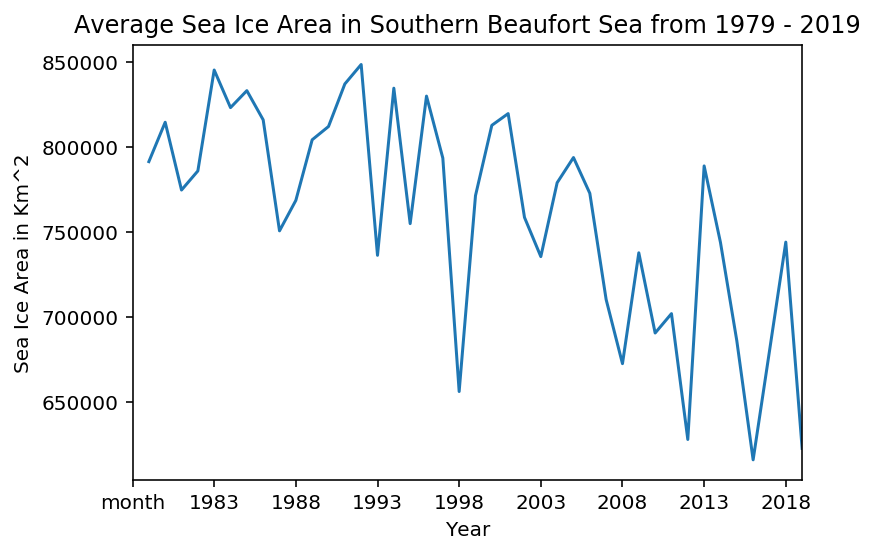

In [18]:
seaice1 = seaice.agg(["min", "max","mean"])
seaice1 = seaice1.T
seaice1.head()

seaice1.plot(legend = False)
plt.xlabel('Year')
plt.ylabel('Sea Ice Area in Km^2')
plt.title('Average Sea Ice Area in Southern Beaufort Sea from 1979 - 2019')
plt.show()

We see from the above graph that there is a downward trend in the amount of sea ice in the Southern Beaufort Sea over time.  In further data analysis, we plan to explore if range of polar bear movement is correlated with sea ice expanse, and has also been decreasing over time.

#### Northern Hemisphere Sea Ice Data <br>
*Data Sources:* <br>
Northern Hemisphere Sea Ice Index: https://nsidc.org/data/seaice_index/archives  [2] <br>
Sea Ice Rate of Change: https://nsidc.org/data/G02135/versions/3  [3]<br>


Since the the data on sea ice is formed from satellite images dating from 1979, we assume a degree of error in sea ice calculations of are. We assume that the quality and precision of measurement tools of satellite images have improved over the last 40 years. While recognize this potential for bias, we beleive that this data is a quality measure of changes in sea ice. 

In [19]:
# Load Northern Hemisphere Sea Ice Index
sea_ice = pd.read_csv('data/N_seaice_extent_daily_v3.0 (1).csv')

# For ease of data manipulation, the year, month and day columns were concatenated in Excel prior to upload
sea_ice

Year   Month   Day       Extent      Missing  \
0      1978      10    26       10.231            0   
1      1978      10    28       10.420            0   
2      1978      10    30       10.557            0   
3      1978      11     1       10.670            0   
4      1978      11     3       10.777            0   
5      1978      11     5       10.968            0   
6      1978      11     7       11.080            0   
7      1978      11     9       11.189            0   
8      1978      11    11       11.314            0   
9      1978      11    13       11.460            0   
10     1978      11    15       11.539            0   
11     1978      11    17       11.696            0   
12     1978      11    19       11.870            0   
13     1978      11    21       12.053            0   
14     1978      11    23       12.274            0   
15     1978      11    25       12.441            0   
16     1978      11    27       12.662            0   
17     1978      11    29       12.684            0   
18     1978      12     1       12.725            0   
19     1978      12     3       12.660            0   
20     1978      12     5       12.785            0   
21     1978      12     7       13.051            0   
22     1978      12     9       13.143            0   
23     1978      12    11       13.437            0   
24     1978      12    13       13.603            0   
25     1978      12    15       13.649            0   
26     1978      12    17       13.807            0   
27     1978      12    19       13.892            0   
28     1978      12    21       13.996            0   
29     1978      12    23       14.189            0   
...     ...     ...   ...          ...          ...   
13318  2019      10    20        5.687            0   
13319  2019      10    21        5.781            0   
13320  2019      10    22        5.869            0   
13321  2019      10    23        6.013            0   
13322  2019      10    24        6.185            0   
13323  2019      10    25        6.445            0   
13324  2019      10    26        6.727            0   
13325  2019      10    27        6.949            0   
13326  2019      10    28        7.156            0   
13327  2019      10    29        7.323            0   
13328  2019      10    30        7.509            0   
13329  2019      10    31        7.706            0   
13330  2019      11     1        7.918            0   
13331  2019      11     2        8.149            0   
13332  2019      11     3        8.228            0   
13333  2019      11     4        8.310            0   
13334  2019      11     5        8.483            0   
13335  2019      11     6        8.557            0   
13336  2019      11     7        8.642            0   
13337  2019      11     8        8.765            0   
13338  2019      11     9        8.801            0   
13339  2019      11    10        8.880            0   
13340  2019      11    11        8.965            0   
13341  2019      11    12        9.060            0   
13342  2019      11    13        9.242            0   
13343  2019      11    14        9.359            0   
13344  2019      11    15        9.387            0   
13345  2019      11    16        9.396            0   
13346  2019      11    17        9.443            0   
13347  2019      11    18        9.554            0   

                                             Source Data  Unnamed: 6  \
0       ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...         NaN   
1       ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...         NaN   
2       ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...         NaN   
3       ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...         NaN   
4       ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...         NaN   
5       ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...         NaN   
6       ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...         NaN   
7       ['ftp://sida

In [20]:
sea_ice.describe()

Year         Month           Day        Extent      Missing  \
count  13348.000000  13348.000000  13348.000000  13348.000000      13348.0   
mean    2000.827764      6.530641     15.732994     11.305746          0.0   
std       11.023141      3.440778      8.801272      3.287971          0.0   
min     1978.000000      1.000000      1.000000      3.340000          0.0   
25%     1992.000000      4.000000      8.000000      8.562000          0.0   
50%     2001.000000      7.000000     16.000000     11.997000          0.0   
75%     2010.000000     10.000000     23.000000     14.218000          0.0   
max     2019.000000     12.000000     31.000000     16.635000          0.0   

       Unnamed: 6  
count         0.0  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN

In [21]:
#Check for Null and Missing data
sea_ice.isna().sum()
sea_ice.isnull().sum()

Year                0
 Month              0
 Day                0
     Extent         0
    Missing         0
 Source Data        0
Unnamed: 6      13348
timestamp           0
dtype: int64

In [22]:
# Rename Columns to Remove extra spaces 
sea_ice = sea_ice.rename(columns={' Month': 'Month', ' Day': 'Day', '     Extent': 'Extent', '    Missing': 'Missing'})

In [23]:
# Drop Unneeded Columns
sea_ice = sea_ice.drop([' Source Data'], axis=1)

In [24]:
sea_ice = sea_ice.drop(['Unnamed: 6'], axis=1)

In [25]:
# Change Time data type
sea_ice['timestamp'] = [pd.to_datetime(i) for i in sea_ice['timestamp']]

### Northern Hemisphere Sea Ice Index in Millions of Squared Kilometers

In [26]:
# Plot Northern Hemisphere Sea Ice Extant (km^ x10^6)
fig = go.Figure()
fig.add_trace(go.Scatter(x=sea_ice.timestamp, y=sea_ice['Extent'], 
                         line_color='deepskyblue'))
fig.update_layout(title_text="Extent of All Northern Hemisphere Sea Ice: KM^2 in millions",
                  xaxis_rangeslider_visible=True)

As seen above, the extent of sea ice is shown by month over a period of decades. We can observe a decline in the extent of sea ice over time. Recall that sea ice melts and refreezes according to season, explaining the shape of data. Scientists attribute this trend in the decline in Arctic sea ice to climate change. [4]

### Ice Melt Change

In [27]:
# to read to Excel File:
ice_change = pd.ExcelFile('data/Sea_Ice_Index_Rates_of_Change_G02135_v3.0.xlsx')

# Get sheet names
ice_change.sheet_names

['NH-Ice-Change-Mkm^2-per-Month',
 'NH-Ice-Change-km^2-per-Day',
 'NH-Ice-Change-mi^2-per-Month',
 'NH-Ice-Change-mi^2-per-Day',
 'SH-Ice-Change-Mkm^2-per-Month',
 'SH-Ice-Change-km^2-per-Day',
 'SH-Ice-Change-mi^2-per-Month',
 'SH-Ice-Change-mi^2-per-Day',
 'Documentation']

In [28]:
# Load Ice change in km^2 per day from 5-day averaged daily values

NH_KM_day = ice_change.parse('NH-Ice-Change-km^2-per-Day', skiprows =1)

# Remove 1978 for only have 2 months for the year
NH_KM_day = NH_KM_day.drop(NH_KM_day.index[0])

# Remove bottom 2 rows because it is summary data

NH_KM_day= NH_KM_day.drop(NH_KM_day.index[-2:])

# Rename Year Column
NH_KM_day = NH_KM_day.rename(columns = {'Unnamed: 0':'Year'})

NH_KM_day

Year  January  February    March    April      May     June      July  \
1   1979  43200.0   25900.0 -22300.0 -26400.0 -58200.0 -46000.0  -81300.0   
2   1980  38600.0   29400.0  -7900.0 -30200.0 -65100.0 -48500.0  -80100.0   
3   1981  44000.0    6500.0  -5500.0 -32500.0 -40400.0 -47300.0  -92100.0   
4   1982  52100.0   20500.0 -11700.0 -28700.0 -56200.0 -51300.0  -82800.0   
5   1983  44600.0   26400.0 -12600.0 -50400.0 -42600.0 -39400.0  -78100.0   
6   1984  34000.0   23700.0  -2800.0 -32900.0 -45500.0 -49000.0  -86500.0   
7   1985  54300.0   14600.0   8900.0 -29100.0 -51900.0 -66900.0  -96300.0   
8   1986  49200.0   27100.0 -11200.0 -35700.0 -57000.0 -42300.0  -80000.0   
9   1987  57500.0   19700.0 -15800.0 -37300.0 -44000.0 -46500.0  -86500.0   
10  1988      NaN   24500.0 -12600.0 -34100.0 -55200.0 -54000.0  -78100.0   
11  1989  40100.0    9400.0 -12600.0 -54300.0 -26900.0 -37000.0  -87700.0   
12  1990  40900.0   26700.0 -13300.0 -53800.0 -38000.0 -56900.0 -100500.0   
13  1991  42800.0   28800.0  -8600.0 -34000.0 -41400.0 -52800.0 -100900.0   
14  1992  43500.0   10500.0  -1400.0 -42100.0 -41700.0 -39500.0  -81300.0   
15  1993  54500.0    3400.0   2100.0 -41500.0 -56900.0 -47900.0  -87900.0   
16  1994  45500.0   10700.0  -3800.0 -34500.0 -46700.0 -56100.0  -81700.0   
17  1995  29200.0   15200.0   -600.0 -48600.0 -50700.0 -49500.0  -96500.0   
18  1996  32000.0   21600.0  -8000.0 -38300.0 -35600.0 -36200.0  -81500.0   
19  1997  38100.0   24500.0  -6200.0 -39300.0 -49400.0 -54000.0  -84300.0   
20  1998  47800.0   21900.0 -16400.0 -35500.0 -47400.0 -71900.0  -70700.0   
21  1999  34700.0   25300.0   3700.0 -32700.0 -44300.0 -85800.0  -65600.0   
22  2000  51700.0   14000.0  -5200.0 -32800.0 -52100.0 -50800.0  -87100.0   
23  2001  45800.0   29500.0 -10600.0 -26500.0 -54200.0 -77500.0  -71400.0   
24  2002  47900.0   17100.0 -12200.0 -40200.0 -44800.0 -49500.0  -96400.0   
25  2003  45300.0   23100.0   -100.0 -52300.0 -42500.0 -59400.0  -86000.0   
26  2004  32300.0   28700.0 -10400.0 -46900.0 -40000.0 -45600.0  -80000.0   
27  2005  33300.0   23800.0  -8500.0 -23400.0 -46400.0 -65900.0  -95100.0   
28  2006  26900.0   19100.0  -3800.0 -26500.0 -46700.0 -68500.0  -77800.0   
29  2007  41800.0   16200.0 -12500.0 -28200.0 -38600.0 -67500.0 -114200.0   
30  2008  50900.0   24800.0  -6900.0 -41100.0 -48600.0 -65800.0  -92300.0   
31  2009  45300.0   22500.0  -2800.0 -23800.0 -55200.0 -65400.0 -109700.0   
32  2010  33000.0   27200.0  13600.0 -35500.0 -68800.0 -88300.0  -76500.0   
33  2011  48500.0   17400.0    100.0 -26500.0 -52800.0 -78500.0  -96000.0   
34  2012  32900.0   30600.0   8200.0 -36900.0 -52200.0 -97200.0  -97400.0   
35  2013  46000.0   28600.0  -5700.0 -39200.0 -40200.0 -72400.0 -104900.0   
36  2014  43600.0   16100.0  -1300.0 -31200.0 -46000.0 -78600.0  -86700.0   
37  2015  34100.0   15100.0  -3300.0 -31300.0 -52500.0 -53400.0 -102100.0   
38  2016  36300.0   20000.0  -6100.0 -37200.0 -61400.0 -55700.0  -86900.0   
39  2017  39100.0   21900.0  -3100.0 -26900.0 -42400.0 -79300.0  -93400.0   
40  2018  38200.0   26100.0   2100.0 -31400.0 -52700.0 -53500.0 -103300.0   
41  2019  50700.0   19400.0 -13600.0 -35400.0 -47700.0 -67700.0 -105700.0   

     August  September   October  November  December  
1  -66000.0    -5300.0   86800.0   66500.0   72300.0  
2  -46400.0    13500.0   63700.0   82600.0   54100.0  
3  -53300.0     4100.0   70600.0   70600.0   74900.0  
4  -53400.0      700.0   95300.0   64100.0   55000.0  
5  -64500.0     8400.0   81600.0   69100.0   48400.0  
6  -57900.0    10900.0   63500.0   82400.0   53700.0  
7  -52300.0     8400.0   80800.0   74100.0   60800.0  
8  -49600.0    10700.0   77900.0   67900.0   53100.0  
9  -68800.0    21800.0   64700.0   80000.0       NaN  
10 -49100.0    15500.0   68200.0   80900.0   58900.0  
11 -56200.0     -200.0   89800.0   76500.0   51600.0  
12 -54000.0     1300.0  117000.0   66800.0   50300.0  
13 -45400.0   -12100.0   99500.0   69700.0   68600.0  

In [29]:
# Data Summary 
NH_KM_day.describe()
NH_KM_day.isna().sum()
NH_KM_day.isnull().sum()

Year         0
January      1
February     0
March        0
April        0
May          0
June         0
July         0
August       0
September    0
October      0
November     1
December     2
dtype: int64

In [30]:
# Transpose
NH_KM_day = NH_KM_day.T

In [31]:
# Change column headers and drop row indexes
NH_KM_day.columns = NH_KM_day.iloc[0]
NH_KM_day = NH_KM_day.drop(NH_KM_day.index[0])

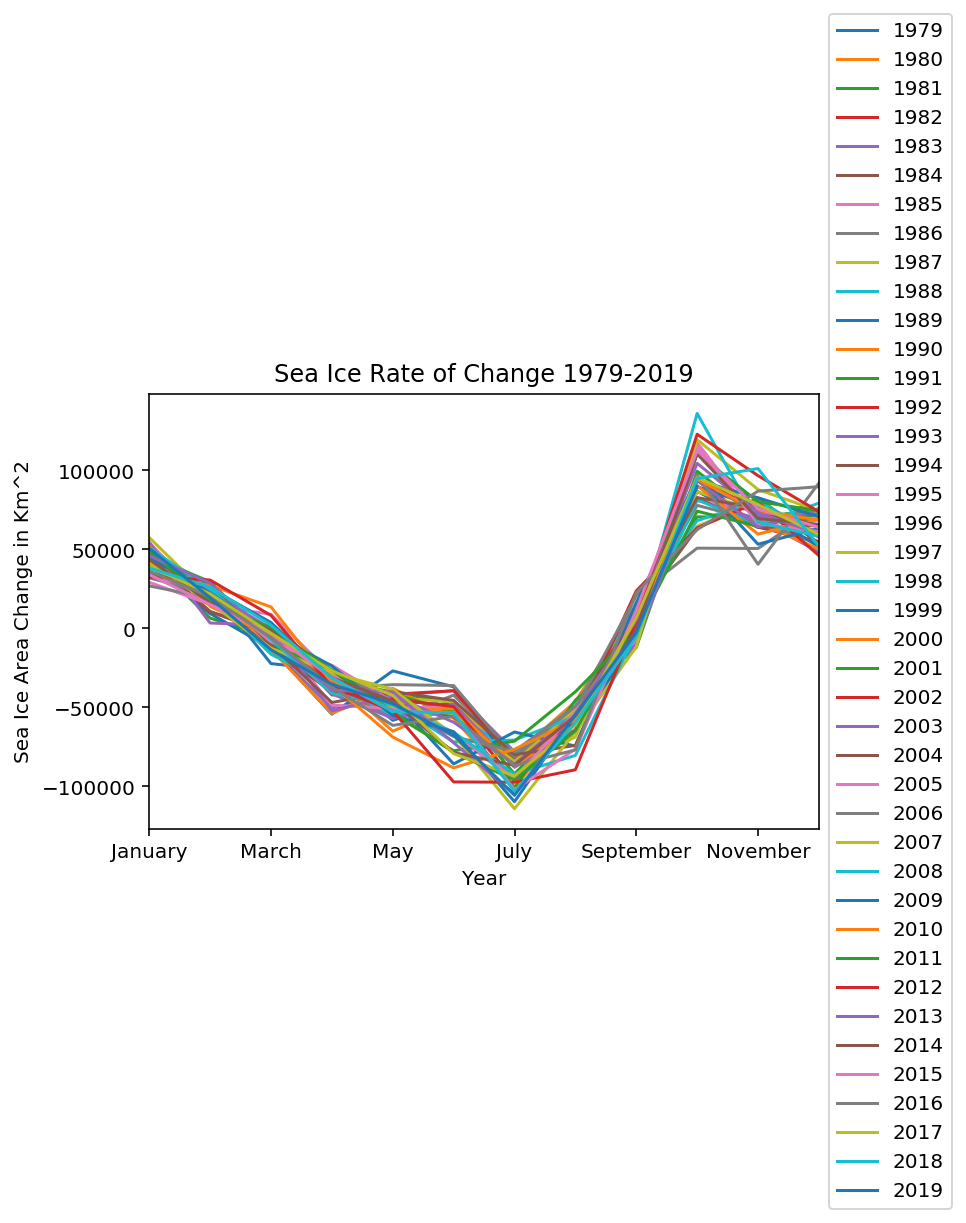

In [32]:
NH_KM_day.plot()
plt.xlabel('Year')
plt.ylabel('Sea Ice Area Change in Km^2')
plt.title("Sea Ice Rate of Change 1979-2019")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

As shown in the plot above, Northern Hemisphere sea ice is at its lowest in July and increases dramatically into the fall. Polar bears are hypercarnivores and feed primarily on arctic seal which they hunt on the sea ice. Polar bears must kill a seal every 10 days to maintain enough calories to survive.  We plan to demonstrate this change in our final project with a highly interactive visual map showing this effect over the last 40 years. 

# Sources <br>
<br>
[1]“Polar Bears,” Polar Bear Facts & Information - Polar Bears International. [Online]. Available: http://polarbearsinternational.org/polar-bears. [Accessed: 21-Nov-2019].
<br>
<br>
[2] Fetterer, F., K. Knowles, W. N. Meier, M. Savoie, and A. K. Windnagel. 2017, updated daily. Sea Ice Index, Version 3. [Sea Ice Index]. Boulder, Colorado USA. NSIDC: National Snow and Ice Data Center. doi: https://doi.org/10.7265/N5K072F8. [November 19, 2019]. <br>
<br>
[3] Fetterer, F., K. Knowles, W. N. Meier, M. Savoie, and A. K. Windnagel. 2017, updated daily. Sea Ice Index, Version 3. [Sea Ice Rate of Change]. Boulder, Colorado USA. NSIDC: National Snow and Ice Data Center. doi: https://doi.org/10.7265/N5K072F8. [November 19, 2019].<br>
<br>
[4] “Climate Change Indicators: Arctic Sea Ice,” EPA, 17-Dec-2016. [Online]. Available: https://www.epa.gov/climate-indicators/climate-change-indicators-arctic-sea-ice. [Accessed: 20-Nov-2019].